In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

4.1.Linear Regression

In [2]:
#정규방정식을 통한 회귀
X = 2*np.random.rand(100,1)
y = 4 + 3*X+np.random.randn(100,1)

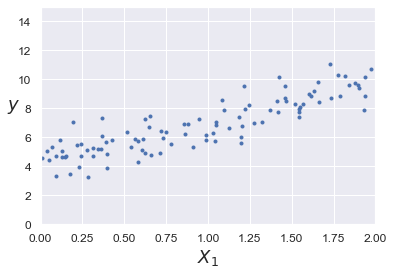

In [3]:
plt.plot(X,y,"b.")
plt.xlabel("$X_1$",fontsize = 18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X]#x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

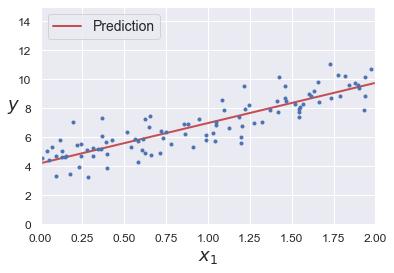

In [6]:
plt.plot(X_new,y_predict,"r-",linewidth = 2, label = "Prediction")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y$",rotation = 0, fontsize = 18)
plt.legend(loc="upper left",fontsize = 14)
plt.axis([0,2,0,15])
plt.show()

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 4.2.1 경사하강법

In [11]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100

weight = np.random.randn(2,1) #random init

for step in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(weight)-y)
    weight = weight - eta * gradients

    if (step+1) % 200 ==0:
        print("Step:{:04d}, weight = \n {}".format(step+1, weight))

print("Final Result : \n{}".format(weight))

Step:0200, weight = 
 [[4.21338573]
 [2.7716236 ]]
Step:0400, weight = 
 [[4.21509444]
 [2.7701149 ]]
Step:0600, weight = 
 [[4.21509616]
 [2.77011339]]
Step:0800, weight = 
 [[4.21509616]
 [2.77011339]]
Step:1000, weight = 
 [[4.21509616]
 [2.77011339]]
Final Result : 
[[4.21509616]
 [2.77011339]]


In [12]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path = None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m*X_b.T.dot(X_b.dot(weight)-y)
        weight = weight - eta*gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$",fontsize = 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta ={}$".format(eta),fontsize = 16 )

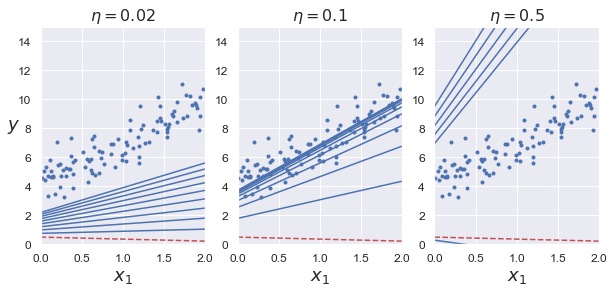

In [13]:
np.random.seed(42)
weight = np.random.randn(2,1) #random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$",rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(weight, eta = 0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta = 0.5)
plt.show()

## 4.2.2 확률적 경사 하강법

In [14]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.20742938],
       [2.74264448]])